In [2]:
pip install --upgrade scikit-learn imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 107.4 MB/s eta 0:00:0000:01:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [1]:


# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import time
import numpy as np
import torch
import torch.nn as nn

# Classifier Libraries
from sklearn.tree import DecisionTreeClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classifi# Core Libraries
import numpy as np
import pandas as pd
import time
import random
import warnings
warnings.filterwarnings("ignore")

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Function
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

# TensorFlow (if needed)
import tensorflow as tf

# Scikit-learn
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    average_precision_score, precision_recall_curve, roc_curve, auc
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# Imbalanced-learn
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.metrics import classification_report_imbalanced

# Collections
from collections import Counter
cation_report_imbalanced
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report,
    average_precision_score, precision_recall_curve
)
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from torch.utils.data import Dataset, DataLoader
import warnings
warnings.filterwarnings("ignore")
import random
import time



2025-08-20 23:08:16.760264: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755731296.995374      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755731297.063789      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


ModuleNotFoundError: No module named 'sklearn.utils._metadata_requests'

In [4]:
import os

print(os.listdir('/kaggle/input/credit-card'))

['creditcard.csv']


In [5]:
df = pd.read_csv('/kaggle/input/credit-card/creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [7]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


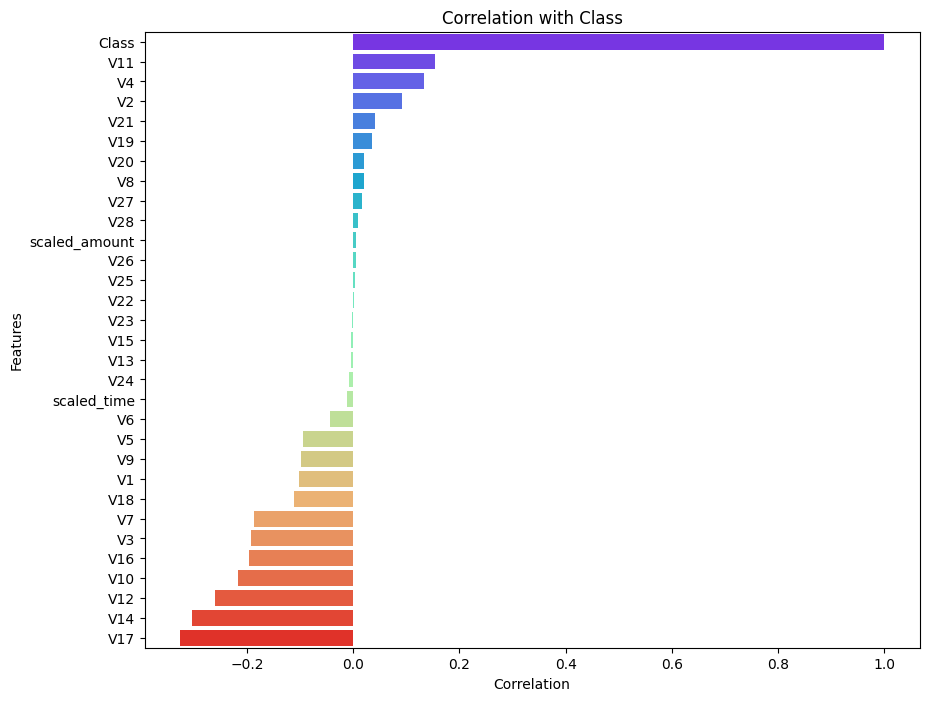

In [8]:
# Correlation matrix
corr = df.corr()
# Correlation with the target variable
corr_target = corr['Class'].sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=corr_target.values, y=corr_target.index, palette='rainbow')
plt.title('Correlation with Class')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.show()

In [9]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

#spliting
original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827075 0.00172925]
[0.99827955 0.00172045]


# ****TabNet Model**

In [10]:

# Ghost Batch Normalization
class GBN(nn.Module):
    def __init__(self, inp, vbs=1024, momentum=0.01):
        super().__init__()
        self.bn = nn.BatchNorm1d(inp, momentum=momentum)
        self.vbs = vbs

    def forward(self, x):
        if x.size(0) <= self.vbs:
            return self.bn(x)
        else:
            chunks = torch.chunk(x, x.size(0) // self.vbs, 0)
            return torch.cat([self.bn(c) for c in chunks], 0)

# GLU with configurable LeakyReLU
class GLU(nn.Module):
    def __init__(self, inp_dim, out_dim, fc=None, vbs=1024, dropout=0.2, negative_slope=0.01):
        super().__init__()
        self.fc = fc if fc else nn.Linear(inp_dim, out_dim * 2)
        self.bn = GBN(out_dim * 2, vbs=vbs)
        self.out_dim = out_dim
        self.dropout = nn.Dropout(dropout)
        self.leaky_relu = nn.LeakyReLU(negative_slope=negative_slope)  # configurable LeakyReLU

    def forward(self, x):
        x = self.bn(self.fc(x))
        x = self.dropout(x)
        x = self.leaky_relu(x)
        return torch.mul(x[:, :self.out_dim], torch.sigmoid(x[:, self.out_dim:]))

# Sparsemax activation
class SparsemaxFunction(Function):
    @staticmethod
    def forward(ctx, input, dim=1):
        ctx.dim = dim
        max_val, _ = input.max(dim=dim, keepdim=True)
        input = input - max_val
        tau, supp_size = SparsemaxFunction.threshold_and_support(input, dim=dim)
        output = torch.clamp(input - tau, min=0)
        ctx.save_for_backward(supp_size, output)
        return output

    @staticmethod
    def backward(ctx, grad_output):
        supp_size, output = ctx.saved_tensors
        dim = ctx.dim
        grad_input = grad_output.clone()
        grad_input[output == 0] = 0
        v_hat = grad_input.sum(dim=dim) / supp_size.to(output.dtype).squeeze()
        v_hat = v_hat.unsqueeze(dim)
        return torch.where(output != 0, grad_input - v_hat, grad_input), None

    @staticmethod
    def threshold_and_support(input, dim=-1):
        input_srt, _ = torch.sort(input, descending=True, dim=dim)
        input_cumsum = input_srt.cumsum(dim) - 1
        rho = torch.arange(1, input.size(dim) + 1, device=input.device).view([1 if i != dim else -1 for i in range(input.dim())])
        support = rho * input_srt > input_cumsum
        support_size = support.sum(dim=dim).unsqueeze(dim)
        tau = input_cumsum.gather(dim, support_size - 1) / support_size.to(input.dtype)
        return tau, support_size

# Attention Transformer
class AttentionTransformer(nn.Module):
    def __init__(self, d_a, inp_dim, relax, vbs=1024):
        super().__init__()
        self.fc = nn.Linear(d_a, inp_dim)
        self.bn = GBN(inp_dim, vbs)
        self.relax = relax

    def forward(self, a, priors):
        a = self.bn(self.fc(a))
        mask = SparsemaxFunction.apply(a * priors)
        priors = priors * (self.relax - mask)
        return mask, priors

# Feature Transformer with LeakyReLU propagation
class FeatureTransformer(nn.Module):
    def __init__(self, inp_dim, out_dim, shared, n_ind, vbs, negative_slope=0.01):
        super().__init__()
        first = True
        self.shared = nn.ModuleList()
        if shared:
            self.shared.append(GLU(inp_dim, out_dim, shared[0], vbs=vbs, negative_slope=negative_slope))
            first = False
            for fc in shared[1:]:
                self.shared.append(GLU(out_dim, out_dim, fc, vbs=vbs, negative_slope=negative_slope))
        else:
            self.shared = None
        self.independ = nn.ModuleList()
        if first:
            self.independ.append(GLU(inp_dim, out_dim, vbs=vbs, negative_slope=negative_slope))
        for x in range(first, n_ind):
            self.independ.append(GLU(out_dim, out_dim, vbs=vbs, negative_slope=negative_slope))
        self.scale = float(np.sqrt(0.5))

    def forward(self, x):
        if self.shared:
            x = self.shared[0](x)
            for glu in self.shared[1:]:
                x = torch.add(x, glu(x))
                x = x * self.scale
        for glu in self.independ:
            x = torch.add(x, glu(x))
            x = x * self.scale
        return x

# Decision Step
class DecisionStep(nn.Module):
    def __init__(self, inp_dim, n_d, n_a, shared, n_ind, relax, vbs, negative_slope=0.01):
        super().__init__()
        self.att = AttentionTransformer(n_a, inp_dim, relax, vbs)
        self.feat_tr = FeatureTransformer(inp_dim, n_d + n_a, shared, n_ind, vbs, negative_slope)

    def forward(self, x, a, priors):
        mask, updated_priors = self.att(a, priors)
        sparse_loss = (-mask * torch.log(mask + 1e-10)).mean()
        x_masked = x * mask
        x_transformed = self.feat_tr(x_masked)
        return x_transformed, updated_priors, sparse_loss

# TabNet Encoder with configurable LeakyReLU
class TabNet(nn.Module):
    def __init__(self, inp_dim, out_dim, n_d, n_a, n_shared, n_ind, n_steps, relax,
                 vbs=1024, dropout=0.2, negative_slope=0.01):
        super().__init__()
        self.n_d = n_d
        self.n_a = n_a
        self.n_shared = n_shared
        self.n_ind = n_ind
        self.n_steps = n_steps
        self.relax = relax
        self.vbs = vbs
        self.bn = nn.BatchNorm1d(inp_dim, momentum=0.01)
        self.leaky_relu = nn.LeakyReLU(negative_slope=negative_slope)

        # Shared layers
        if n_shared > 0:
            self.shared = nn.ModuleList()
            self.shared.append(nn.Linear(inp_dim, 2 * (n_d + n_a)))
            for x in range(n_shared - 1):
                self.shared.append(nn.Linear(n_d + n_a, 2 * (n_d + n_a)))
        else:
            self.shared = None

        # First step + decision steps
        self.first_step = FeatureTransformer(inp_dim, n_d + n_a, self.shared, n_ind, vbs, negative_slope)
        self.steps = nn.ModuleList()
        for x in range(n_steps - 1):
            self.steps.append(DecisionStep(inp_dim, n_d, n_a, self.shared, n_ind, relax, vbs, negative_slope))

        self.fc = nn.Linear(n_d, out_dim)

    def forward(self, x, priors):
        assert not torch.isnan(x).any()
        x = self.bn(x)
        x_a = self.first_step(x)[:, self.n_d:]
        output = torch.zeros(x.size(0), self.n_d).to(x.device)
        total_sparse_loss = 0

        for step in self.steps:
            x_trans, priors, sparse_loss = step(x, x_a, priors)
            output += self.leaky_relu(x_trans[:, :self.n_d])  # LeakyReLU applied
            x_a = x_trans[:, self.n_d:]
            total_sparse_loss += sparse_loss

        return self.fc(output), total_sparse_loss


In [11]:
X_train = original_Xtrain
X_test = original_Xtest
y_train = original_ytrain
y_test = original_ytest


# **Training the model without oversampling Technique**



Epoch [1/100] | Train Loss: 0.0544 | Train F1: 0.0039 | Val Loss: 0.0103 | Val F1: 0.2444
Epoch [11/100] | Train Loss: 0.0042 | Train F1: 0.6377 | Val Loss: 0.0042 | Val F1: 0.7547
Epoch [21/100] | Train Loss: 0.0033 | Train F1: 0.7530 | Val Loss: 0.0033 | Val F1: 0.8101
Epoch [31/100] | Train Loss: 0.0033 | Train F1: 0.7932 | Val Loss: 0.0029 | Val F1: 0.8302
Epoch [41/100] | Train Loss: 0.0030 | Train F1: 0.7883 | Val Loss: 0.0033 | Val F1: 0.8302
Epoch [51/100] | Train Loss: 0.0027 | Train F1: 0.7918 | Val Loss: 0.0030 | Val F1: 0.8535
Epoch [61/100] | Train Loss: 0.0026 | Train F1: 0.7966 | Val Loss: 0.0033 | Val F1: 0.8302
Epoch [71/100] | Train Loss: 0.0023 | Train F1: 0.8107 | Val Loss: 0.0033 | Val F1: 0.8280
Epoch [81/100] | Train Loss: 0.0023 | Train F1: 0.8153 | Val Loss: 0.0034 | Val F1: 0.8302
Epoch [91/100] | Train Loss: 0.0023 | Train F1: 0.8020 | Val Loss: 0.0033 | Val F1: 0.8354


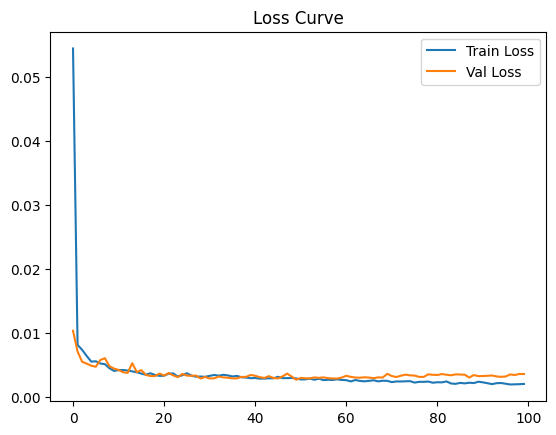

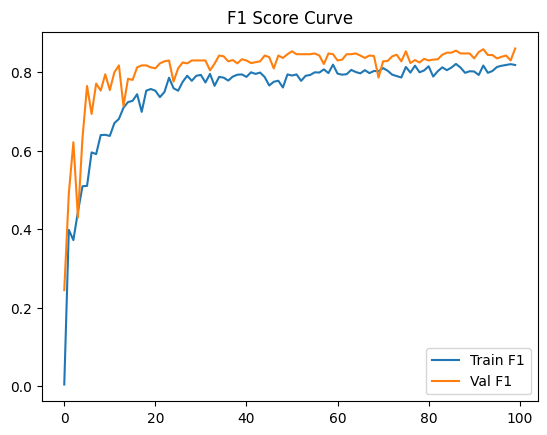


--- Test Set Evaluation ---
Accuracy: 0.9994
F1 Score: 0.8085
Precision: 0.8444
Recall: 0.7755
ROC-AUC: 0.9676

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56864
         1.0       0.84      0.78      0.81        98

    accuracy                           1.00     56962
   macro avg       0.92      0.89      0.90     56962
weighted avg       1.00      1.00      1.00     56962



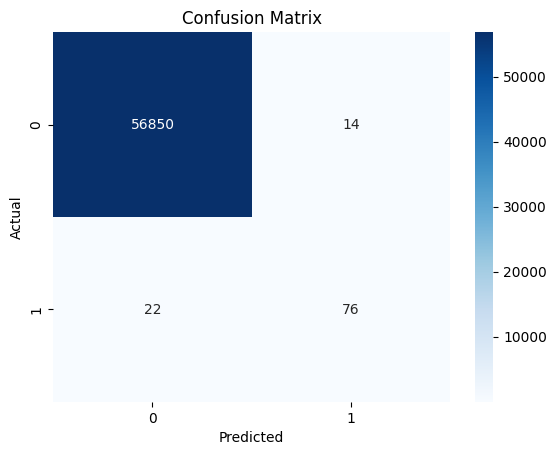

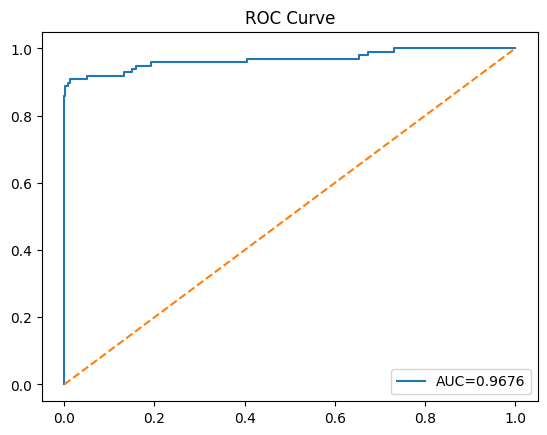

In [10]:
#  1. Dataset split (Train → Train + Validation, Test untouched)
X_train_main, X_val, y_train_main, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

#  2. Dataset wrapper
class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
    def __len__(self): return len(self.X)
    def __getitem__(self, idx): return self.X[idx], self.y[idx]

#  3. Dataloaders
batch_size = 512
train_loader = DataLoader(MyDataset(X_train_main, y_train_main), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(MyDataset(X_val, y_val), batch_size=batch_size, shuffle=False)
test_loader = DataLoader(MyDataset(X_test, y_test), batch_size=batch_size, shuffle=False)

#  4. Initialize Model with LeakyReLU negative_slope parameter
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TabNet(
    inp_dim=X_train.shape[1],
    out_dim=1,
    n_d=64,
    n_a=64,
    n_shared=2,
    n_ind=2,
    n_steps=3,
    relax=1.2,
    dropout=0.2,
    negative_slope=0.01   # Pass the LeakyReLU slope here
).to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

#  5. Training Loop
epochs = 100
train_losses, val_losses, train_f1s, val_f1s = [], [], [], []

for epoch in range(epochs):
    # --- Training ---
    model.train()
    epoch_loss, preds, labels = 0, [], []
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs, sparse_loss = model(X_batch, torch.ones(X_batch.size(0), X_batch.size(1)).to(device))
        loss = criterion(outputs.view(-1), y_batch) + 1e-4 * sparse_loss
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        preds += (torch.sigmoid(outputs).view(-1).detach().cpu().numpy() > 0.5).astype(int).tolist()
        labels += y_batch.cpu().numpy().tolist()
    train_losses.append(epoch_loss / len(train_loader))
    train_f1s.append(f1_score(labels, preds))

    # --- Validation ---
    model.eval()
    val_loss, val_preds, val_labels = 0, [], []
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs, sparse_loss = model(X_batch, torch.ones(X_batch.size(0), X_batch.size(1)).to(device))
            loss = criterion(outputs.view(-1), y_batch)
            val_loss += loss.item()
            val_preds += (torch.sigmoid(outputs).view(-1).cpu().numpy() > 0.5).astype(int).tolist()
            val_labels += y_batch.cpu().numpy().tolist()
    val_losses.append(val_loss / len(val_loader))
    val_f1s.append(f1_score(val_labels, val_preds))

    if epoch % 10 == 0:

        print(f"Epoch [{epoch+1}/{epochs}] | Train Loss: {train_losses[-1]:.4f} | Train F1: {train_f1s[-1]:.4f} | Val Loss: {val_losses[-1]:.4f} | Val F1: {val_f1s[-1]:.4f}")

#  6. Plot Training Curves
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.legend(); plt.title("Loss Curve"); plt.show()

plt.plot(train_f1s, label="Train F1")
plt.plot(val_f1s, label="Val F1")
plt.legend(); plt.title("F1 Score Curve"); plt.show()

#  7. Test Evaluation
model.eval()
test_preds, test_labels, test_probs = [], [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        outputs, _ = model(X_batch, torch.ones(X_batch.size(0), X_batch.size(1)).to(device))
        probs = torch.sigmoid(outputs).view(-1).cpu().numpy()
        preds = (probs > 0.5).astype(int)
        test_probs += probs.tolist()
        test_preds += preds.tolist()
        test_labels += y_batch.numpy().tolist()

#  8. Test Metrics
print("\n--- Test Set Evaluation ---")
print(f"Accuracy: {accuracy_score(test_labels, test_preds):.4f}")
print(f"F1 Score: {f1_score(test_labels, test_preds):.4f}")
print(f"Precision: {precision_score(test_labels, test_preds):.4f}")
print(f"Recall: {recall_score(test_labels, test_preds):.4f}")
print(f"ROC-AUC: {roc_auc_score(test_labels, test_probs):.4f}")
print("\nClassification Report:\n", classification_report(test_labels, test_preds))

#  9. Confusion Matrix
cm = confusion_matrix(test_labels, test_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix"); plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.show()

# 10. ROC Curve
fpr, tpr, _ = roc_curve(test_labels, test_probs)
plt.plot(fpr, tpr, label=f"AUC={auc(fpr,tpr):.4f}")
plt.plot([0,1],[0,1],'--')
plt.legend(); plt.title("ROC Curve"); plt.show()


# With SMOTE

In [12]:
# -------------------
# Dataset Class
# -------------------
class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
    def __len__(self): return len(self.X)
    def __getitem__(self, idx): return self.X[idx], self.y[idx]

# -------------------
# Hyperparameters
# -------------------
input_dim = original_Xtrain.shape[1]
output_dim = 1
batch_size = 512
n_steps = 3
n_d, n_a = 64, 64
n_ind, n_shared = 2, 2
relax = 1.2
lr = 0.002
epochs = 100
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


--- Fold 1 ---
Epoch 1/100 | Train Loss: 0.0737 | Train F1: 0.9713 | Val Loss: 0.0159 | Val F1: 0.3575
Epoch 11/100 | Train Loss: 0.0062 | Train F1: 0.9983 | Val Loss: 0.0062 | Val F1: 0.7150
Epoch 21/100 | Train Loss: 0.0034 | Train F1: 0.9991 | Val Loss: 0.0056 | Val F1: 0.7473
Epoch 31/100 | Train Loss: 0.0029 | Train F1: 0.9992 | Val Loss: 0.0053 | Val F1: 0.8000
Epoch 41/100 | Train Loss: 0.0023 | Train F1: 0.9994 | Val Loss: 0.0057 | Val F1: 0.7907
Epoch 51/100 | Train Loss: 0.0019 | Train F1: 0.9995 | Val Loss: 0.0058 | Val F1: 0.7816
Epoch 61/100 | Train Loss: 0.0018 | Train F1: 0.9996 | Val Loss: 0.0050 | Val F1: 0.8095
Epoch 71/100 | Train Loss: 0.0017 | Train F1: 0.9996 | Val Loss: 0.0055 | Val F1: 0.8364
Epoch 81/100 | Train Loss: 0.0014 | Train F1: 0.9997 | Val Loss: 0.0060 | Val F1: 0.8447
Epoch 91/100 | Train Loss: 0.0014 | Train F1: 0.9997 | Val Loss: 0.0054 | Val F1: 0.8428

--- Fold 2 ---
Epoch 1/100 | Train Loss: 0.0796 | Train F1: 0.9683 | Val Loss: 0.0475 | Val F1

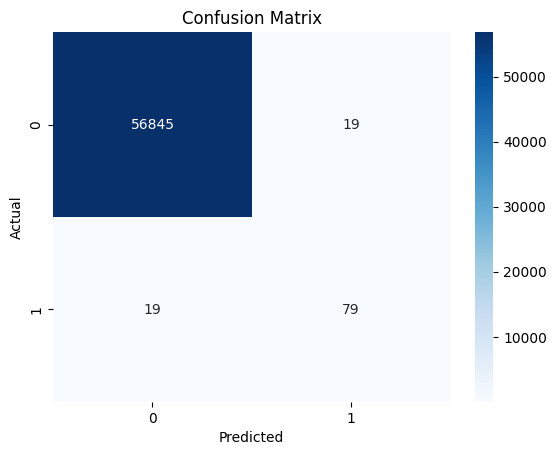

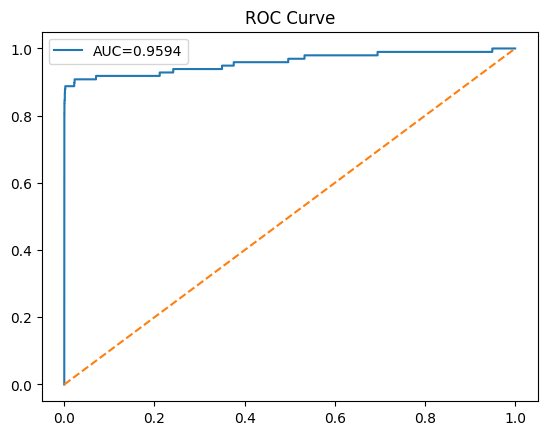

In [13]:
# -------------------
# Cross-Validation with SMOTE (LeakyReLU Corrected)
# -------------------
accuracy_lst, precision_lst, recall_lst, f1_lst, auc_lst = [], [], [], [], []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(skf.split(original_Xtrain, original_ytrain), 1):
    print(f"\n--- Fold {fold} ---")

    # Split folds
    X_train_fold, y_train_fold = original_Xtrain[train_idx], original_ytrain[train_idx]
    X_val_fold, y_val_fold = original_Xtrain[val_idx], original_ytrain[val_idx]

    # Apply SMOTE on training fold only
    sm = SMOTE(random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train_fold, y_train_fold)

    # Datasets
    train_loader = DataLoader(MyDataset(X_train_res, y_train_res), batch_size=batch_size, shuffle=True)
    X_val_tensor = torch.tensor(X_val_fold, dtype=torch.float32).to(device)
    y_val_tensor = torch.tensor(y_val_fold, dtype=torch.float32)

    #  Model with LeakyReLU
    model = TabNet(
        inp_dim=input_dim,
        out_dim=output_dim,
        n_d=n_d,
        n_a=n_a,
        n_shared=n_shared,
        n_ind=n_ind,
        n_steps=n_steps,
        relax=relax,
        dropout=0.2,
        negative_slope=0.01  # LeakyReLU parameter
    ).to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.BCEWithLogitsLoss()

    # Track losses/F1
    train_losses, val_losses, train_f1s, val_f1s = [], [], [], []

    # Training Loop
    for epoch in range(epochs):
        model.train()
        epoch_loss, preds, labels = 0, [], []
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            priors = torch.ones(xb.size()).to(device)
            logits, sparse_loss = model(xb, priors)
            loss = criterion(logits.view(-1), yb) + 1e-3 * sparse_loss
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
            preds += (torch.sigmoid(logits).view(-1).detach().cpu().numpy() > 0.5).astype(int).tolist()
            labels += yb.cpu().numpy().tolist()
        train_losses.append(epoch_loss / len(train_loader))
        train_f1s.append(f1_score(labels, preds))

        # Validation
        model.eval()
        with torch.no_grad():
            priors = torch.ones(X_val_tensor.size()).to(device)
            val_logits, _ = model(X_val_tensor, priors)
            val_probs = torch.sigmoid(val_logits.view(-1)).cpu().numpy()
            val_preds = (val_probs > 0.5).astype(int)
        val_f1 = f1_score(y_val_fold, val_preds)
        val_f1s.append(val_f1)
        val_losses.append(nn.BCELoss()(torch.tensor(val_probs), y_val_tensor.cpu()).item())

        if epoch % 10 == 0:
            print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_losses[-1]:.4f} | Train F1: {train_f1s[-1]:.4f} | Val Loss: {val_losses[-1]:.4f} | Val F1: {val_f1:.4f}")

    # Store fold metrics
    accuracy_lst.append(accuracy_score(y_val_fold, val_preds))
    precision_lst.append(precision_score(y_val_fold, val_preds))
    recall_lst.append(recall_score(y_val_fold, val_preds))
    f1_lst.append(val_f1)
    auc_lst.append(roc_auc_score(y_val_fold, val_probs))

# -------------------
# CV Summary
# -------------------
print("\n--- Cross-Validation Results ---")
print(f"Accuracy: {np.mean(accuracy_lst):.4f}")
print(f"Precision: {np.mean(precision_lst):.4f}")
print(f"Recall: {np.mean(recall_lst):.4f}")
print(f"F1 Score: {np.mean(f1_lst):.4f}")
print(f"ROC-AUC: {np.mean(auc_lst):.4f}")

# -------------------
# Final Training on Full SMOTE Data
# -------------------
Xsm_train, ysm_train = SMOTE(random_state=42).fit_resample(original_Xtrain, original_ytrain)
train_loader = DataLoader(MyDataset(Xsm_train, ysm_train), batch_size=batch_size, shuffle=True)

model = TabNet(
    inp_dim=input_dim,
    out_dim=output_dim,
    n_d=n_d,
    n_a=n_a,
    n_shared=n_shared,
    n_ind=n_ind,
    n_steps=n_steps,
    relax=relax,
    dropout=0.2,
    negative_slope=0.01  #  LeakyReLU
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=lr)
criterion = nn.BCEWithLogitsLoss()

start = time.time()
model.train()
for epoch in range(epochs):
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        priors = torch.ones(xb.size()).to(device)
        logits, sparse_loss = model(xb, priors)
        loss = criterion(logits.view(-1), yb) + 1e-3 * sparse_loss
        loss.backward()
        optimizer.step()
end = time.time()
print(f"\nFinal model training took {end - start:.2f} seconds")

# -------------------
# Final Test Evaluation
# -------------------
X_test_tensor = torch.tensor(original_Xtest, dtype=torch.float32).to(device)
y_test_true = original_ytest

model.eval()
with torch.no_grad():
    priors = torch.ones(X_test_tensor.size()).to(device)
    test_logits, _ = model(X_test_tensor, priors)
    test_probs = torch.sigmoid(test_logits.view(-1)).cpu().numpy()
    test_preds = (test_probs > 0.5).astype(int)

# Metrics
print("\n--- Final Test Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test_true, test_preds):.4f}")
print(f"F1 Score: {f1_score(y_test_true, test_preds):.4f}")
print(f"Precision: {precision_score(y_test_true, test_preds):.4f}")
print(f"Recall: {recall_score(y_test_true, test_preds):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test_true, test_probs):.4f}")
print("\nClassification Report:\n", classification_report(y_test_true, test_preds))

# Confusion Matrix
cm = confusion_matrix(y_test_true, test_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix"); plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_true, test_probs)
plt.plot(fpr, tpr, label=f"AUC={auc(fpr,tpr):.4f}")
plt.plot([0,1],[0,1],'--')
plt.legend(); plt.title("ROC Curve"); plt.show()


# Using SVMSMOTE(LEAKY-RELU)

In [14]:
# -------------------
# Dataset Class
# -------------------
class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
    def __len__(self): return len(self.X)
    def __getitem__(self, idx): return self.X[idx], self.y[idx]

# -------------------
# Hyperparameters
# -------------------
input_dim = original_Xtrain.shape[1]
output_dim = 1
batch_size = 512
n_steps = 3
n_d, n_a = 64, 64
n_ind, n_shared = 2, 2
relax = 1.2
lr = 0.002
epochs = 100
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


--- Fold 1 ---
Epoch 1/100 | Train Loss: 0.0331 | Train F1: 0.9882 | Val Loss: 0.0106 | Val F1: 0.5534
Epoch 11/100 | Train Loss: 0.0037 | Train F1: 0.9993 | Val Loss: 0.0044 | Val F1: 0.8144
Epoch 21/100 | Train Loss: 0.0024 | Train F1: 0.9995 | Val Loss: 0.0041 | Val F1: 0.8242
Epoch 31/100 | Train Loss: 0.0019 | Train F1: 0.9997 | Val Loss: 0.0034 | Val F1: 0.8447
Epoch 41/100 | Train Loss: 0.0016 | Train F1: 0.9997 | Val Loss: 0.0031 | Val F1: 0.8662
Epoch 51/100 | Train Loss: 0.0014 | Train F1: 0.9998 | Val Loss: 0.0036 | Val F1: 0.8608
Epoch 61/100 | Train Loss: 0.0012 | Train F1: 0.9998 | Val Loss: 0.0032 | Val F1: 0.8718
Epoch 71/100 | Train Loss: 0.0011 | Train F1: 0.9998 | Val Loss: 0.0033 | Val F1: 0.8608
Epoch 81/100 | Train Loss: 0.0010 | Train F1: 0.9998 | Val Loss: 0.0037 | Val F1: 0.8608
Epoch 91/100 | Train Loss: 0.0010 | Train F1: 0.9998 | Val Loss: 0.0062 | Val F1: 0.8500

--- Fold 2 ---
Epoch 1/100 | Train Loss: 0.0338 | Train F1: 0.9887 | Val Loss: 0.0101 | Val F1

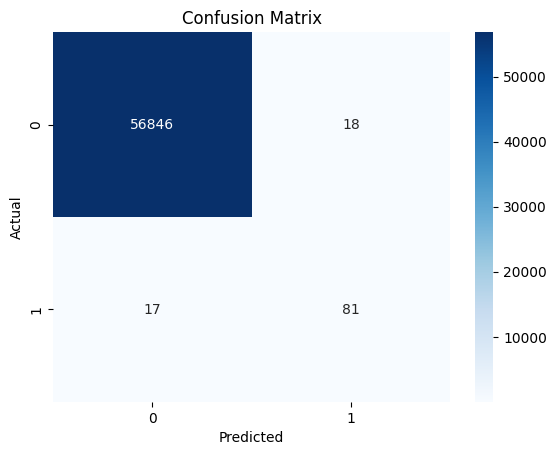

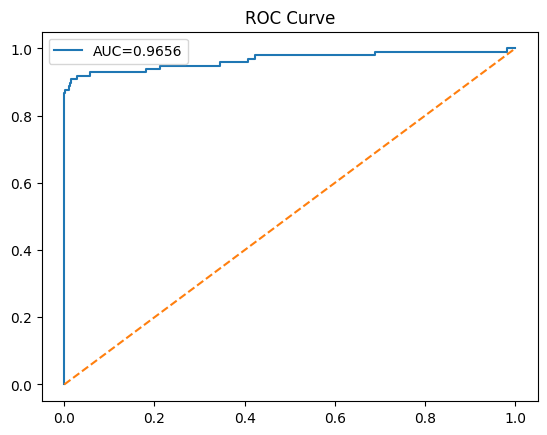

In [15]:
from imblearn.over_sampling import SVMSMOTE

# -------------------
# Cross-Validation with SVMSMOTE (LeakyReLU)
# -------------------
accuracy_lst, precision_lst, recall_lst, f1_lst, auc_lst = [], [], [], [], []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(skf.split(original_Xtrain, original_ytrain), 1):
    print(f"\n--- Fold {fold} ---")

    # Split folds
    X_train_fold, y_train_fold = original_Xtrain[train_idx], original_ytrain[train_idx]
    X_val_fold, y_val_fold = original_Xtrain[val_idx], original_ytrain[val_idx]

    #  Apply SVMSMOTE on training fold only
    sm = SVMSMOTE(random_state=42, k_neighbors=5, m_neighbors=10)  
    X_train_res, y_train_res = sm.fit_resample(X_train_fold, y_train_fold)

    # Datasets
    train_loader = DataLoader(MyDataset(X_train_res, y_train_res), batch_size=batch_size, shuffle=True)
    X_val_tensor = torch.tensor(X_val_fold, dtype=torch.float32).to(device)
    y_val_tensor = torch.tensor(y_val_fold, dtype=torch.float32)

    #  Model with LeakyReLU
    model = TabNet(
        inp_dim=input_dim,
        out_dim=output_dim,
        n_d=n_d,
        n_a=n_a,
        n_shared=n_shared,
        n_ind=n_ind,
        n_steps=n_steps,
        relax=relax,
        dropout=0.2,
        negative_slope=0.01  #  LeakyReLU parameter
    ).to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.BCEWithLogitsLoss()

    # Track losses/F1
    train_losses, val_losses, train_f1s, val_f1s = [], [], [], []

    # Training Loop
    for epoch in range(epochs):
        model.train()
        epoch_loss, preds, labels = 0, [], []
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            priors = torch.ones(xb.size()).to(device)
            logits, sparse_loss = model(xb, priors)
            loss = criterion(logits.view(-1), yb) + 1e-3 * sparse_loss
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
            preds += (torch.sigmoid(logits).view(-1).detach().cpu().numpy() > 0.5).astype(int).tolist()
            labels += yb.cpu().numpy().tolist()
        train_losses.append(epoch_loss / len(train_loader))
        train_f1s.append(f1_score(labels, preds))

        # Validation
        model.eval()
        with torch.no_grad():
            priors = torch.ones(X_val_tensor.size()).to(device)
            val_logits, _ = model(X_val_tensor, priors)
            val_probs = torch.sigmoid(val_logits.view(-1)).cpu().numpy()
            val_preds = (val_probs > 0.5).astype(int)
        val_f1 = f1_score(y_val_fold, val_preds)
        val_f1s.append(val_f1)
        val_losses.append(nn.BCELoss()(torch.tensor(val_probs), y_val_tensor.cpu()).item())

        if epoch % 10 == 0:
            print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_losses[-1]:.4f} | Train F1: {train_f1s[-1]:.4f} | Val Loss: {val_losses[-1]:.4f} | Val F1: {val_f1:.4f}")

    # Store fold metrics
    accuracy_lst.append(accuracy_score(y_val_fold, val_preds))
    precision_lst.append(precision_score(y_val_fold, val_preds))
    recall_lst.append(recall_score(y_val_fold, val_preds))
    f1_lst.append(val_f1)
    auc_lst.append(roc_auc_score(y_val_fold, val_probs))

# -------------------
# CV Summary
# -------------------
print("\n--- Cross-Validation Results ---")
print(f"Accuracy: {np.mean(accuracy_lst):.4f}")
print(f"Precision: {np.mean(precision_lst):.4f}")
print(f"Recall: {np.mean(recall_lst):.4f}")
print(f"F1 Score: {np.mean(f1_lst):.4f}")
print(f"ROC-AUC: {np.mean(auc_lst):.4f}")

# -------------------
# Final Training on Full SVMSMOTE Data
# -------------------
Xsm_train, ysm_train = SVMSMOTE(random_state=42, k_neighbors=5, m_neighbors=10).fit_resample(original_Xtrain, original_ytrain)
train_loader = DataLoader(MyDataset(Xsm_train, ysm_train), batch_size=batch_size, shuffle=True)

model = TabNet(
    inp_dim=input_dim,
    out_dim=output_dim,
    n_d=n_d,
    n_a=n_a,
    n_shared=n_shared,
    n_ind=n_ind,
    n_steps=n_steps,
    relax=relax,
    dropout=0.2,
    negative_slope=0.01  #  LeakyReLU
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=lr)
criterion = nn.BCEWithLogitsLoss()

start = time.time()
model.train()
for epoch in range(epochs):
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        priors = torch.ones(xb.size()).to(device)
        logits, sparse_loss = model(xb, priors)
        loss = criterion(logits.view(-1), yb) + 1e-3 * sparse_loss
        loss.backward()
        optimizer.step()
end = time.time()
print(f"\nFinal model training took {end - start:.2f} seconds")

# -------------------
# Final Test Evaluation
# -------------------
X_test_tensor = torch.tensor(original_Xtest, dtype=torch.float32).to(device)
y_test_true = original_ytest

model.eval()
with torch.no_grad():
    priors = torch.ones(X_test_tensor.size()).to(device)
    test_logits, _ = model(X_test_tensor, priors)
    test_probs = torch.sigmoid(test_logits.view(-1)).cpu().numpy()
    test_preds = (test_probs > 0.5).astype(int)

# Metrics
print("\n--- Final Test Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test_true, test_preds):.4f}")
print(f"F1 Score: {f1_score(y_test_true, test_preds):.4f}")
print(f"Precision: {precision_score(y_test_true, test_preds):.4f}")
print(f"Recall: {recall_score(y_test_true, test_preds):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test_true, test_probs):.4f}")
print("\nClassification Report:\n", classification_report(y_test_true, test_preds))

# Confusion Matrix
cm = confusion_matrix(y_test_true, test_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix"); plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_true, test_probs)
plt.plot(fpr, tpr, label=f"AUC={auc(fpr,tpr):.4f}")
plt.plot([0,1],[0,1],'--')
plt.legend(); plt.title("ROC Curve"); plt.show()
